## Customer Personality Analysis/ Customer Segmentation

Input Data is availabe from the link:  https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv

In [71]:
# Import basic dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import Scikit-learn dependencies
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

# Set Figure size in sns
sns.set(rc={'figure.figsize':(16,16)})

In [72]:
# Importing and Understanding the Data
df = pd.read_csv('marketing_campaign.csv',sep=';')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [73]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [75]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [76]:
# create a duplicate data
df_copy = df.copy()

In [77]:
# Handle. Missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [78]:
# Number of missing values
a = df['Income'].isnull().sum()
b = (a/df.shape[0])*100
print("To Simplify the process")
print("percentage of Missing value:",b)


To Simplify the process
percentage of Missing value: 1.0714285714285714


The Number of  Missing valus in the toatal data is nearly 1%, hence we'll remove them. 

In [79]:
df=df.dropna(subset=['Income'])
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [80]:
df.shape

(2216, 29)

Now, the shape of our data has been reduced because of removing the Null value rows.

Number of rows after deleting Missing values: 2216

Number of Columns after dleting Missing values: 29 

In [81]:
# Check if there is any duplicate 
df.duplicated().sum()

0

In the above features, it is not posssible to delete columns randomly, So Correlation chart is analysed.


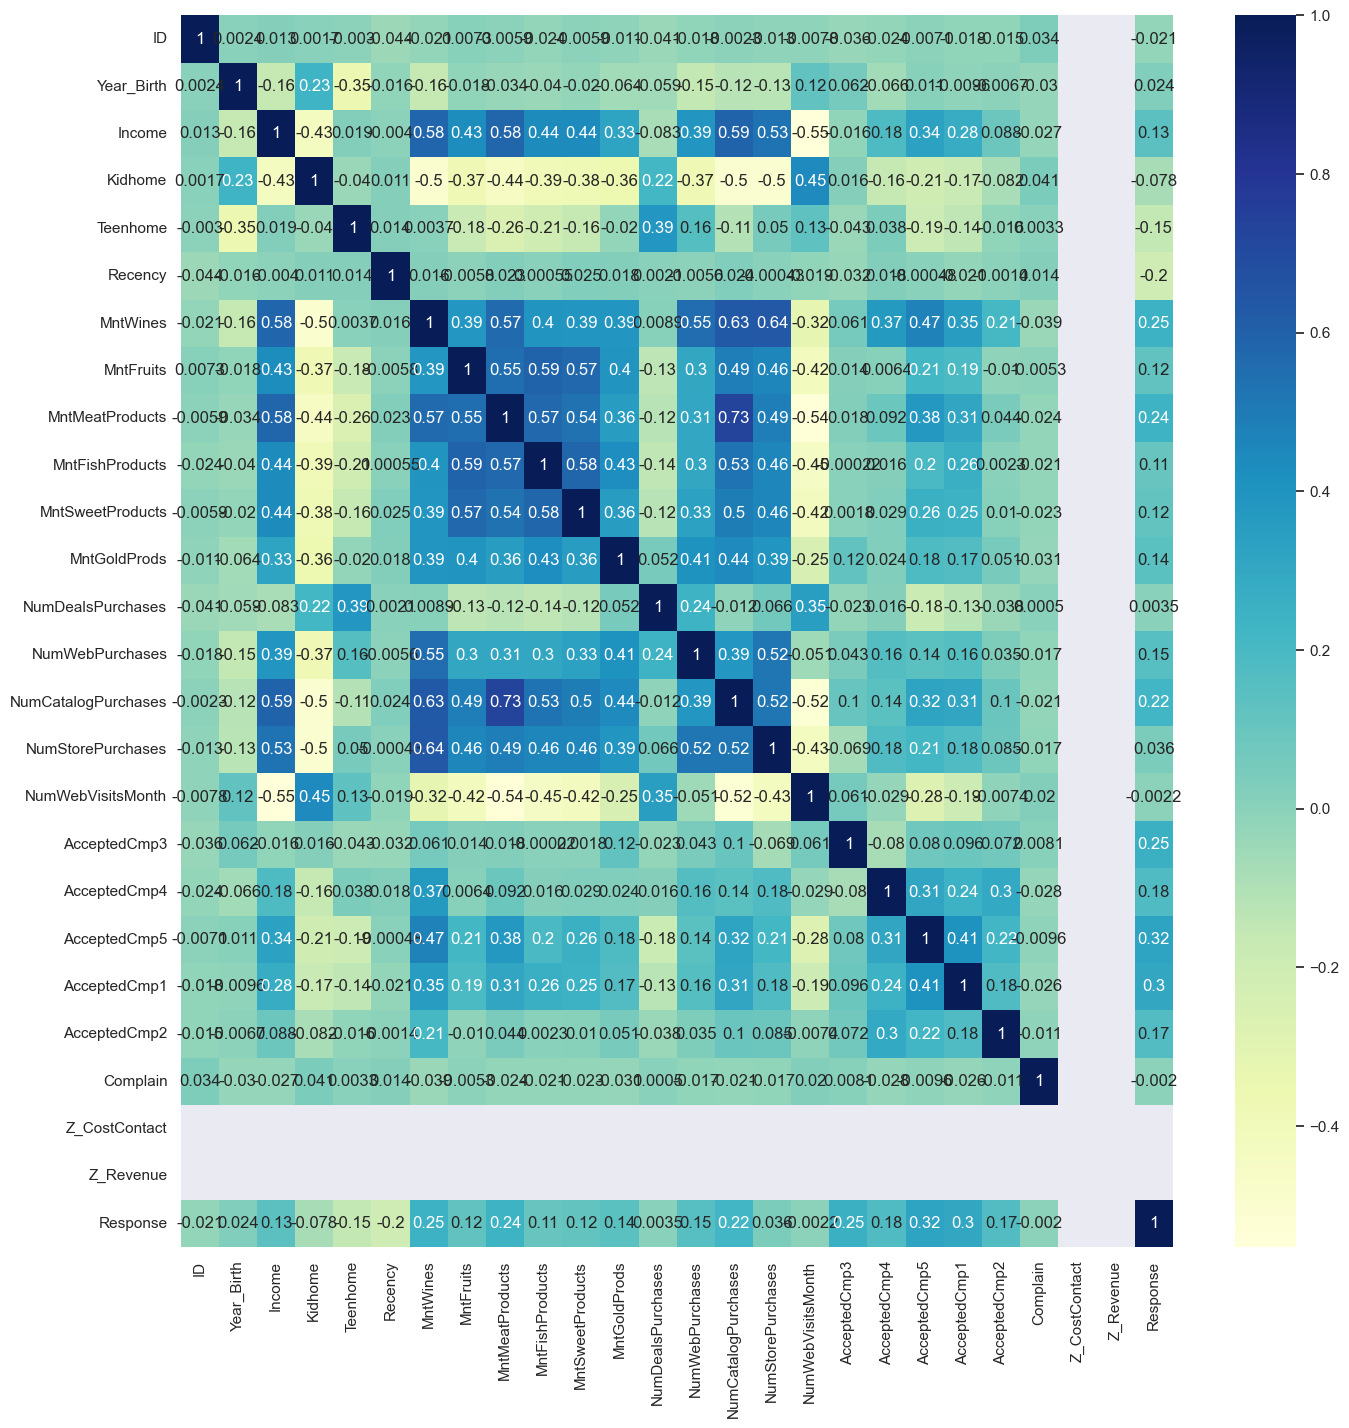

In [82]:
# correlation is plotted in heatmap
df_corr= sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Z_CostContact and Z_Revenue have only 1 value.
It does not have any value in the model.  Hence These can be dropped


In [83]:
df=df.drop(columns=['Z_CostContact', 'Z_Revenue'])
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

UNIVARIATE ANALYSIS

No.of Unique values. in Year_birth: 59


<Axes: xlabel='Year_Birth'>

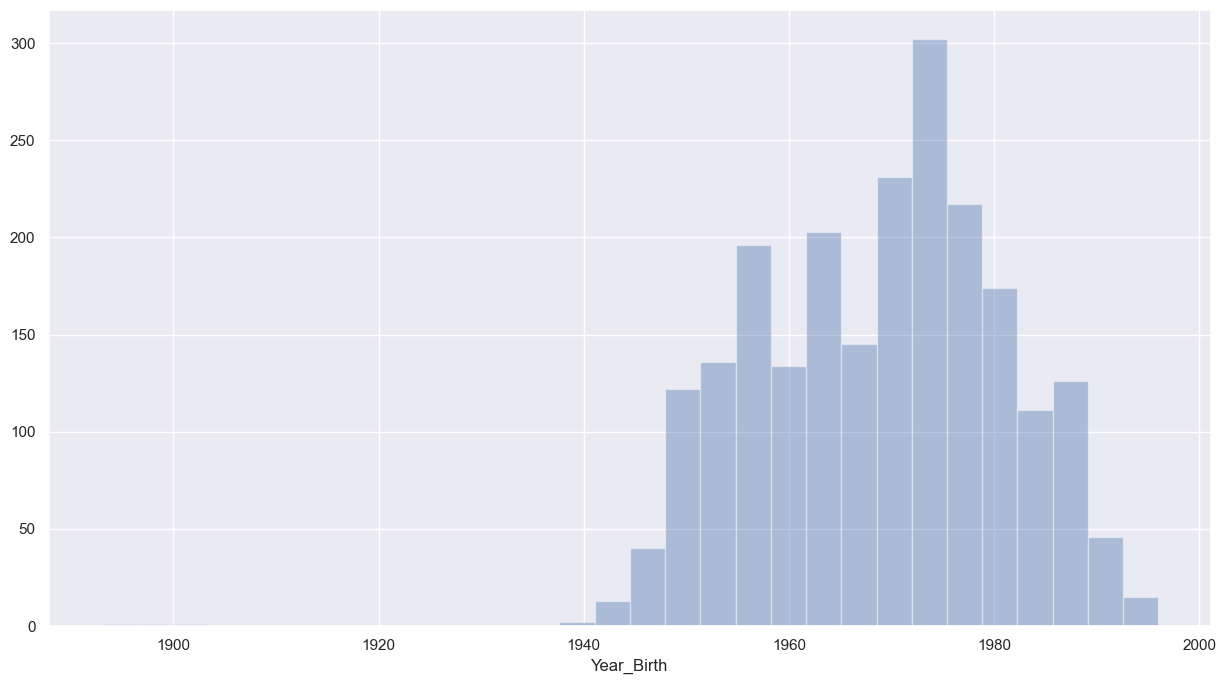

In [84]:
# Year_Birth feature
plt.figure(figsize= (15,8))

print("No.of Unique values. in Year_birth:",df['Year_Birth'].nunique())

sns.distplot(df['Year_Birth'], kde = False,bins=30)

The above plot shows the people based on their Birth year. Hence the year_Birth mustbe converted into AGE

In [85]:
# New column 'Age' is created from 'Year_Birth'
df['Age']=(2022 - df['Year_Birth'])
df['Age']

0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2216, dtype: int64

<Axes: xlabel='Age'>

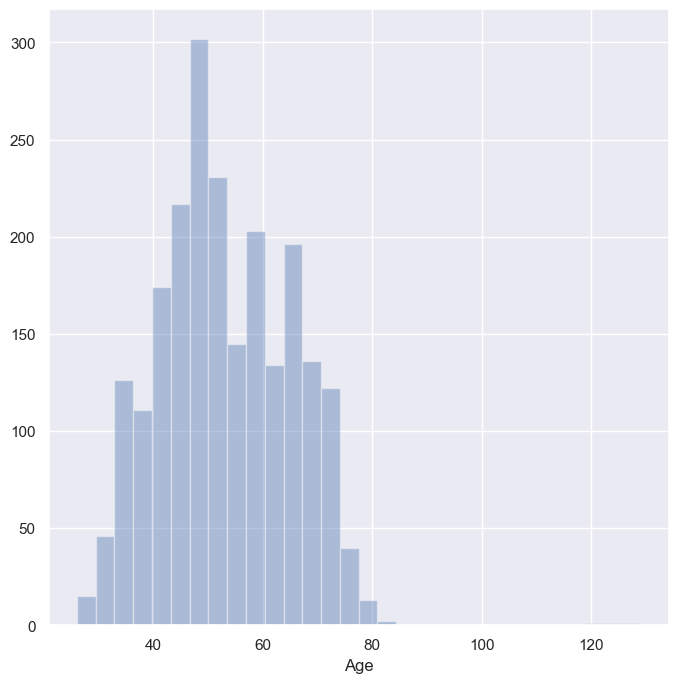

In [86]:
plt.rcParams['figure.figsize'] = [8,8]
sns.distplot(df['Age'], kde = False, bins=30)

In [87]:
# Now 'Year_Birth' feature can be dropped.
df=df.drop(columns=["Year_Birth"],axis=1)
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')

It seems there are some outliers with Age near 120 years. 

In [88]:
df['Age'].value_counts()

46     89
51     86
47     83
50     78
44     76
52     75
57     74
49     72
53     70
48     69
66     55
43     53
64     52
45     52
70     52
54     51
56     50
63     50
68     49
62     49
67     48
40     44
59     44
60     44
55     44
71     42
39     41
36     41
65     41
58     41
42     39
41     38
38     38
61     35
69     35
37     32
73     30
33     29
34     29
72     29
35     27
74     21
32     18
76     16
75     16
31     15
30     13
77      8
78      7
79      6
27      5
29      5
28      3
26      2
123     1
81      1
129     1
122     1
82      1
Name: Age, dtype: int64

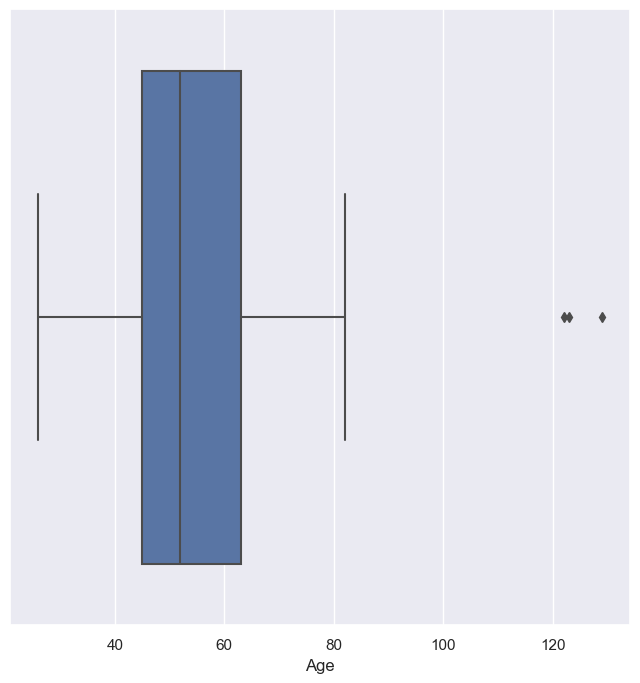

In [89]:
# Box plot 
sns.boxplot(x=df["Age"])
plt.show()

It is evident that there are outliers in our data which can be removed.

In [90]:
df.shape

(2216, 27)

In [91]:
# Outliers removal
(df['Age']>=120).value_counts()

False    2213
True        3
Name: Age, dtype: int64

In [92]:
print(df[df['Age'] >= 120].index.values)

[192 239 339]


In [93]:
(df['Age']>120).value_counts()

False    2213
True        3
Name: Age, dtype: int64

In [94]:
df.drop(index = [192,239,339], inplace=True)

In [95]:
df.shape

(2213, 27)

Outliers are removed. 
Number of rows after removal = 2213
Number of Columns after removal = 23 

In [96]:
# Income feature
df['Income'].value_counts()


7500.0     12
35860.0     4
67445.0     3
34176.0     3
80134.0     3
           ..
51124.0     1
74250.0     1
40760.0     1
41452.0     1
52869.0     1
Name: Income, Length: 1971, dtype: int64

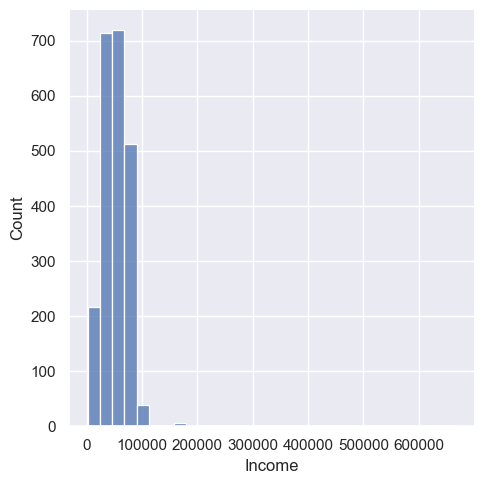

In [97]:
# Distribution  plot
sns.displot(x=df["Income"],bins=30)
plt.show()

Income Distributon Lies majorly between 0 to 100000.

only few datapoints lie beyond that.

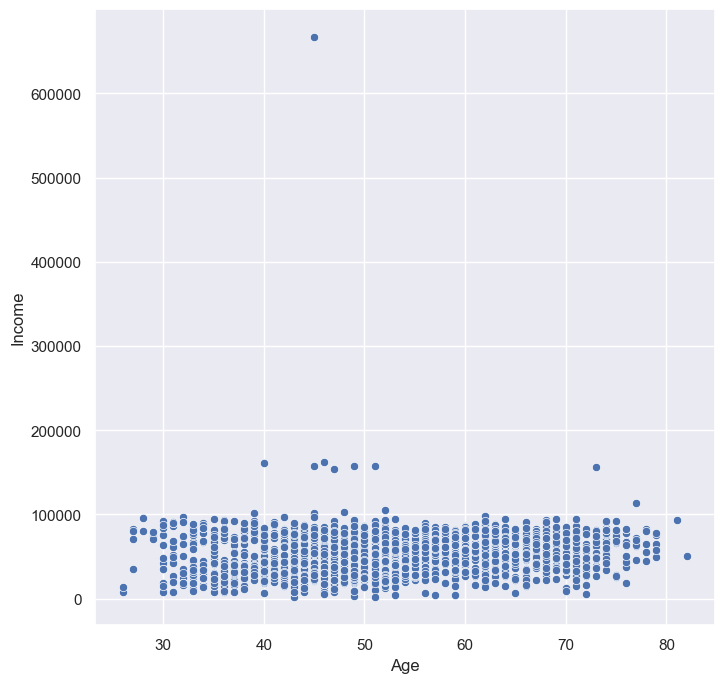

In [98]:
#Scatter plot between Age and Income 
sns.scatterplot(df,x='Age',y='Income')
plt.show()

From the Above it is evident that there is one value far away from others. 
We Consider it as Outlier and removed below.

In [99]:
(df['Income']>200000).value_counts()

False    2212
True        1
Name: Income, dtype: int64

In [100]:
print(df[df['Income'] > 200000].index.values)

[2233]


In [101]:
df.drop(index = [2233], inplace=True)

In [102]:
df.shape

(2212, 27)

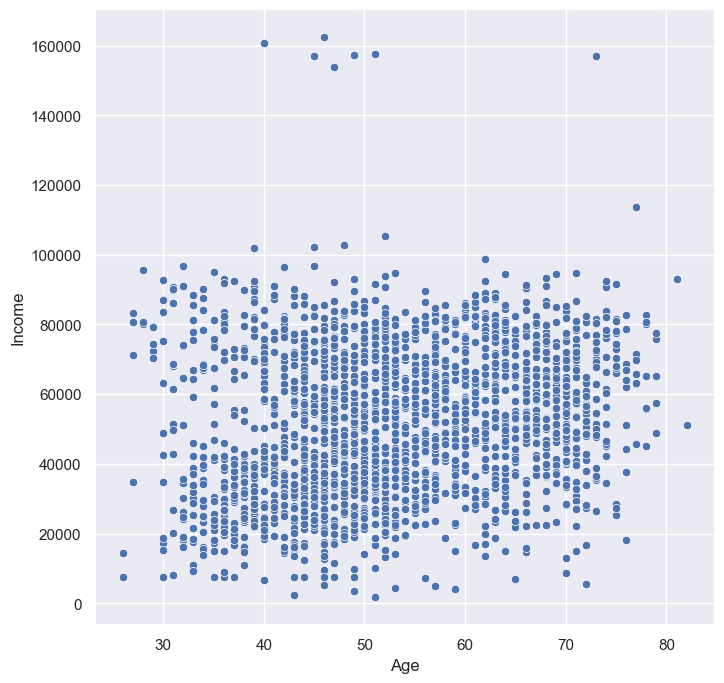

In [103]:
sns.scatterplot(df,x='Age',y='Income')
plt.show()

### Observation:
    It is found that the distribution varies across the ages and income levels.
    Only few point are with Age between 40 and 50 have their Income near 160000 and only one between age 70 to 80 near 160000

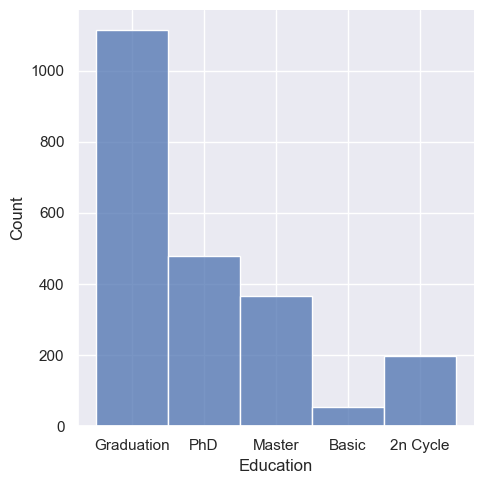

In [104]:
# Univariate Analysis on EDUCATION
sns.displot(x=df["Education"],bins=30)
plt.show()

In [105]:
# Percentage of each category in Education feature
print(df['Education'].value_counts())
print(df['Education'].value_counts().sum())

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64
2212


In [106]:
(df['Education'].value_counts() / df['Education'].value_counts().sum())*100

Graduation    50.406872
PhD           21.699819
Master        16.500904
2n Cycle       8.951175
Basic          2.441230
Name: Education, dtype: float64

### Observation:
    1. The Total Count of the Graduation (in EdUCATION) is higher than others.
    Percentage of Customers with Graduation level education are 50.4%
    Percentage of Customers with Phd level education are 21.7%
    Percentage of Customers with Masters education level are 16.5%
    Percentage of Customers with 2nd cycle education level are 8.95%
    Percentage of Customers with Basic education level are 2.45%

In [107]:
'''
#Scatterplot between Education and Income
sns.scatterplot(df,x='Education',y='Income')
plt.show()'''

"\n#Scatterplot between Education and Income\nsns.scatterplot(df,x='Education',y='Income')\nplt.show()"

In [108]:
# Univariate Analysis for 'Marital Status'
df['Marital_Status'].dtype

dtype('O')

In [109]:
df['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

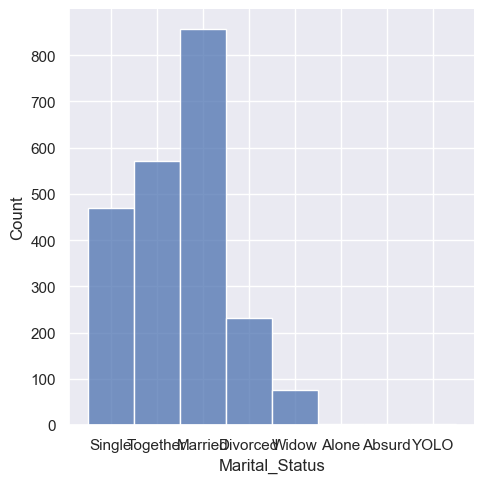

In [110]:
sns.displot(x=df["Marital_Status"])
plt.show()

In [111]:
'''
# Scatter plot between Marital status and Income.
sns.scatterplot(df,x='Marital_Status',y='Income')
plt.show()
'''

"\n# Scatter plot between Marital status and Income.\nsns.scatterplot(df,x='Marital_Status',y='Income')\nplt.show()\n"

In [112]:
'''
# Scatter plot between 'Marital_Status' and 'Age'
sns.scatterplot(df,  x='Age', y='Marital_Status')
plt.show()
'''

"\n# Scatter plot between 'Marital_Status' and 'Age'\nsns.scatterplot(df,  x='Age', y='Marital_Status')\nplt.show()\n"

#### The datapoints for the categories, 'Alone','Absurd','YOLO' can be joined as one category 'Others' in the. dataset.

In [113]:
df['Marital_Status']=df['Marital_Status'].replace({'Alone':'Others','Absurd':'Others','YOLO':'Others'})

In [114]:
df['Marital_Status'].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Others        7
Name: Marital_Status, dtype: int64

In [115]:
'''# Scatter plot between 'Marital_Status' and 'Age'
sns.scatterplot(df,  x='Age', y='Marital_Status')
plt.show()
'''

"# Scatter plot between 'Marital_Status' and 'Age'\nsns.scatterplot(df,  x='Age', y='Marital_Status')\nplt.show()\n"

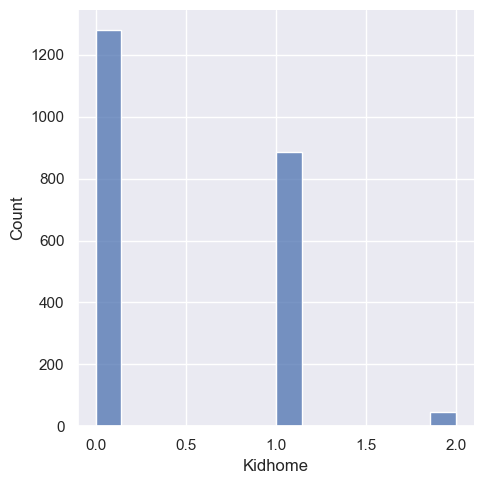

In [116]:
#UNIVARIATE ANALYSIS on 'Kidhome'
sns.displot(x=df["Kidhome"])
plt.show()

In [117]:
df['Kidhome'].value_counts()

0    1281
1     885
2      46
Name: Kidhome, dtype: int64

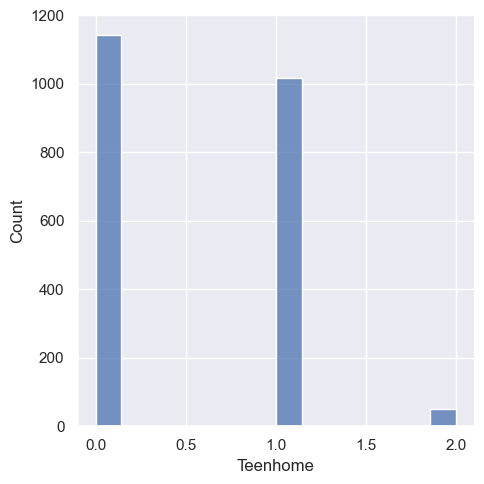

In [118]:
#UNIVARIATE ANALYSIS on 'teenhome'
sns.displot(x=df["Teenhome"])
plt.show()

In [119]:
df['Teenhome'].value_counts()

0    1144
1    1017
2      51
Name: Teenhome, dtype: int64

### Observation:
    1.From the above plot,it seems that there are *1281 customers with No kids*, *885 customers with 1kid*, *46 customers with 2 kids* in their homes.
    2.from the above plots, it seems there are *1144 customers with No Teens*, *1017 customers with 1 teen*, *51 customers with 2 teens* in thier homes.
    3.The Customer buying behaviour may change based on number of kids an teens.

In [120]:
# Kids and Teens are added as new column 'Children'
df['Childrenhome']= df['Kidhome'] + df['Teenhome']
df['Childrenhome'].head()

0    0
1    2
2    0
3    1
4    1
Name: Childrenhome, dtype: int64

In [121]:
df['Childrenhome'].value_counts()

1    1114
0     632
2     416
3      50
Name: Childrenhome, dtype: int64

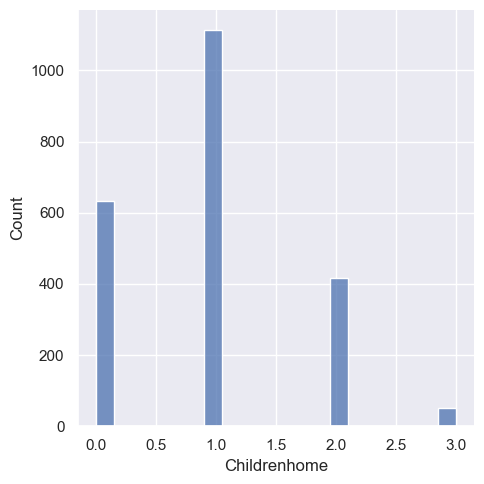

In [122]:
sns.displot(x=df['Childrenhome'])

### Observation:
    1. Number of Customers with No children in their home: 632
    2. Number of Customers with 1 children in their home: 1114
    3. Number of Customers with 2 children in their home: 4
    4. Number of Customers with 3 children in their home: 632

In [123]:
# UNIVARIATE ANALYSIS for Dt_Customer feature
df['Dt_Customer'].describe()

count           2212
unique           662
top       2012-08-31
freq              12
Name: Dt_Customer, dtype: object

In [124]:
df['Dt_Customer'].value_counts()

2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2014-05-22    10
              ..
2013-01-24     1
2013-07-20     1
2014-02-03     1
2013-11-09     1
2014-01-09     1
Name: Dt_Customer, Length: 662, dtype: int64

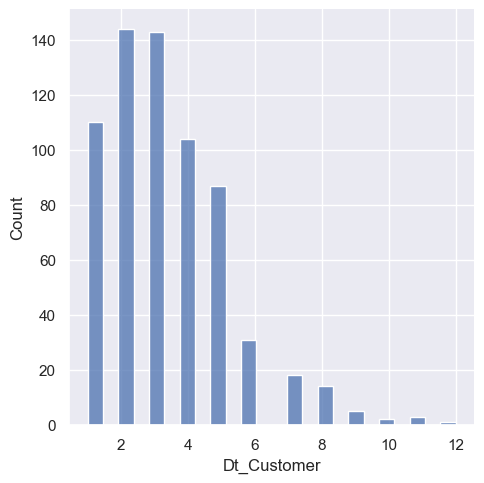

In [125]:
# Dt_Customer
sns.displot(x=df['Dt_Customer'].value_counts())

### Observation:
    1. The count is high in February and March month and gradually decreases in later months.

In [126]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Childrenhome'],
      dtype='object')

In [127]:
#Adding all the Expenses in a new column 'Expenses'
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [128]:
df['Expenses'].head()

0    1617
1      27
2     776
3      53
4     422
Name: Expenses, dtype: int64

In [129]:
#MAX,MIN,AVG
df['Expenses'].describe()

count    2212.000000
mean      607.268083
std       602.513364
min         5.000000
25%        69.000000
50%       397.000000
75%      1048.000000
max      2525.000000
Name: Expenses, dtype: float64

### Observatin:
    1. Maximum expense customer made: 2525
    2. Minimum expense customeer made: 5
    4. Mean expense customer made: 607

In [130]:
#All the accepted columns are added as 'Total AcceptedCmp'
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [131]:
df['TotalAcceptedCmp']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: TotalAcceptedCmp, Length: 2212, dtype: int64

Text(0.5, 1.0, 'Frequency ofCategories in TotalAcceptedCmp Variable')

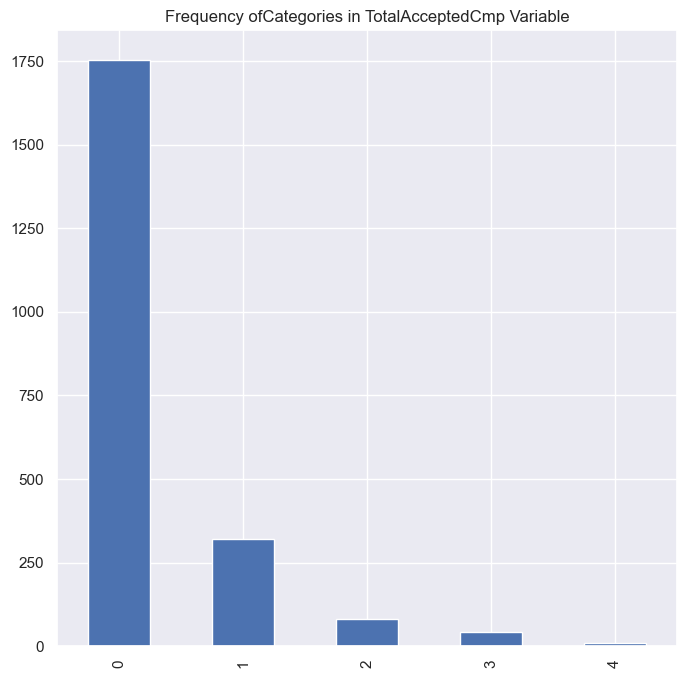

In [132]:
#Plotting "TotalAcceptedCmp"
df['TotalAcceptedCmp'].value_counts().plot(kind='bar')
plt.title("Frequency ofCategories in TotalAcceptedCmp Variable")

In [133]:
#Unique values in "TotalAcceptedCmp"
print("Unique values im TotalAcceptedCmp:" '\n',df['TotalAcceptedCmp'].value_counts())


Unique values im TotalAcceptedCmp:
 0    1754
1     322
2      81
3      44
4      11
Name: TotalAcceptedCmp, dtype: int64


In [134]:
# Convert to Pecentage:
df['TotalAcceptedCmp'].value_counts().sum()

2212

In [135]:
(df['TotalAcceptedCmp'].value_counts() / df['TotalAcceptedCmp'].value_counts().sum())*100

0    79.294756
1    14.556962
2     3.661844
3     1.989150
4     0.497288
Name: TotalAcceptedCmp, dtype: float64

### Obseravtions:
    1. Accepted column is Binary is in Binary nature-- 1/0 --> Accepted/ Not Accepted.
    2. Customers accepted the offer in the campaign are "0" are 79.2% -- 1754
    3. Customers accepted the offer in the campaign are "1" are 14.5% -- 322
    4. Customers accepted the offer in the campaign are "2" are 3.6% -- 81
    5. Customers accepted the offer in the campaign are "3" are 1.9% -- 44
    6. Customers accepted the offer in the campaign are "4" are 0.5% -- 11

In [136]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Childrenhome', 'Expenses',
       'TotalAcceptedCmp'],
      dtype='object')

In [137]:
df.drop(['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2'],axis = 1,inplace =True)
df.drop(['ID'],axis=1,inplace=True)

In [138]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Childrenhome', 'Expenses',
       'TotalAcceptedCmp'],
      dtype='object')

In [158]:
# Univariate analysis for Purchases made on several medium
df['NumDealsPurchases'].unique()

array([ 3,  2,  1,  5,  4, 15,  7,  6,  9,  0,  8, 10, 13, 11, 12])

In [151]:
df['NumCatalogPurchases'].unique()

array([10,  1,  2,  0,  3,  4,  6, 28,  9,  5,  8,  7, 11, 22])

In [152]:
df['NumStorePurchases'].unique()

array([ 4,  2, 10,  6,  7,  0,  3,  8,  5, 12,  9, 13, 11,  1])

In [153]:
df['NumWebVisitsMonth'].unique()

array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13])

In [159]:
# All the Purchase can be addedin single column as 'TotalPurchase'
df['TotalPurchase'] = df['NumDealsPurchases']+ df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebVisitsMonth']

In [161]:
df['TotalPurchase'].unique()

array([24, 10, 17, 12, 19, 22, 20, 14, 21, 15, 16, 44, 23, 18, 13, 11, 25,
        9, 31, 26,  8, 27,  7, 37,  6, 29, 30, 32, 28,  2,  0, 35, 33, 34,
        1])

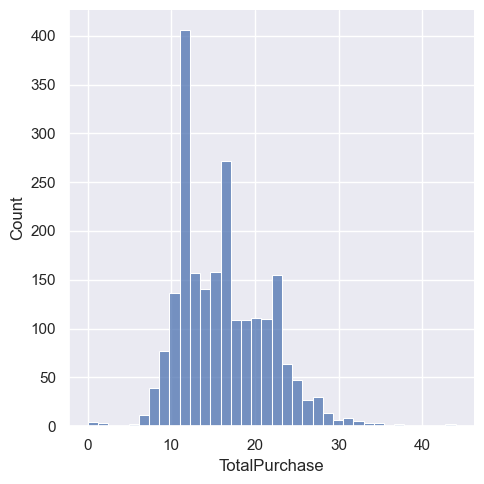

In [164]:
sns.displot(df['TotalPurchase'])

<Axes: >

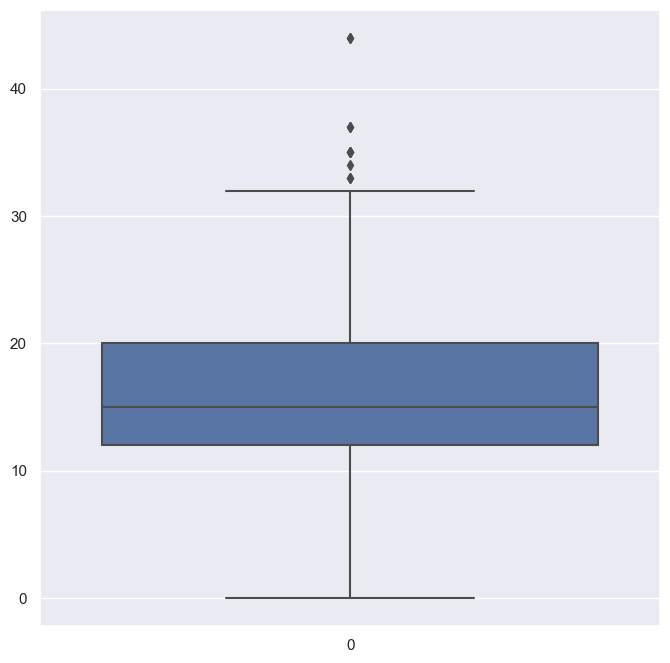

In [165]:
sns.boxplot(df['TotalPurchase'])